In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# three means of clustering

In [16]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

def kmeans(X, n_clusters):
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred = km.predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, s=20, cmap='Paired')
    plt.title("K-means")

def dbscan(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, s=20, cmap='Paired')
    plt.title("DBSCAN")
    
def hier(X, n_clusters):
    hier = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = hier.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, s=20, cmap='Paired')
    plt.title("Hierarchical")

In [17]:
def create_dataset_00():
    Centers = [
        (0,0),
        (1,1),
        (2,1),
        (1,3)
    ]
    Centers = np.array(Centers)
    Points = []
    for center in Centers:
        var = np.array([[1,.5], [0,2]])
        Points.append(
            np.random.multivariate_normal(
                center,
                0.05*var,
                100
            )
        )
    Points = np.vstack(Points)
    return Points

In [26]:
Points = create_dataset_00()
X = Points

C:\Users\li\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: covariance is not positive-semidefinite.
  app.launch_new_instance()


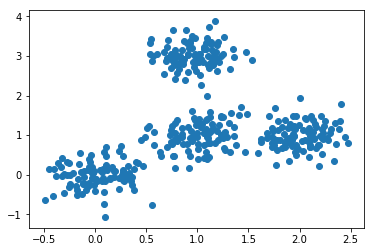

In [19]:
plt.scatter(X[:,0], X[:,1])
plt.show()

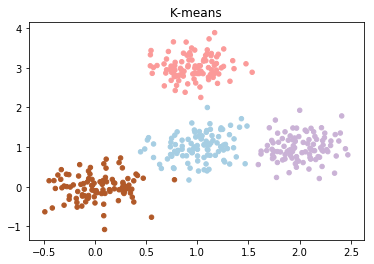

In [20]:
kmeans(X, 4)

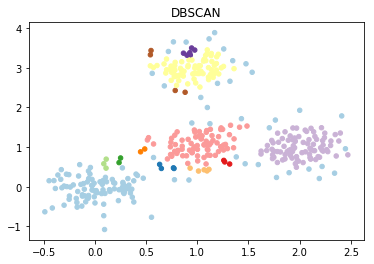

In [21]:
dbscan(X, 0.12, 2)

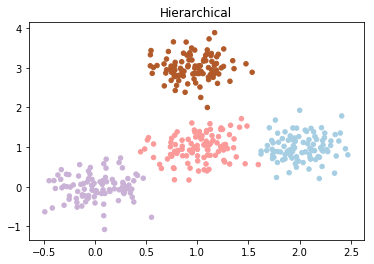

In [22]:
hier(X, 4)

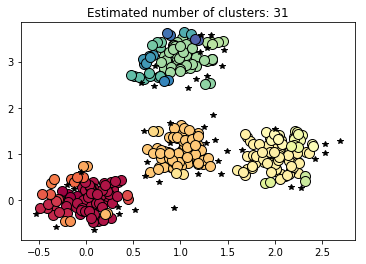

In [14]:
# A sophisticated clustering algorithm of BDSCAN
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.1, min_samples=2).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
db_labels = db.labels_
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)

import matplotlib.pyplot as plt
# Black removed and is used for noise instead.
unique_labels = set(db_labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (db_labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], '*', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [15]:
# sample two

In [16]:
from random import random
def create_dataset_01():
    def line0(x):
        return (x, 10 - x**2 + (random() - 0.5))
    Points = []
    for _ in range(1000):
        x = 5*(random() - 0.5)
        point = line0(x)
        Points.append(point)
        
    def line1(x):
        return (x, 5*random() +((x)*(x-8)) + 5 )
    
    for _ in range(1000):
        x = 5*(random()+.1)
        point = line1(x)
        Points.append(point)
    
    Points = np.array(Points)
    return np.vstack(
        [
            Points, 
            np.random.multivariate_normal((5,5), [[1,0],[0,1]],100)
        ])

In [17]:
X1 = create_dataset_01()

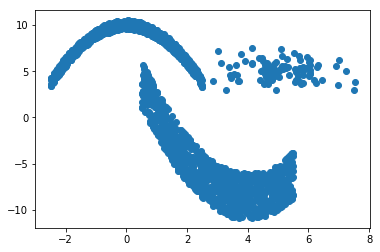

In [18]:
plt.scatter(X1[:,0], X1[:,1])
plt.show()

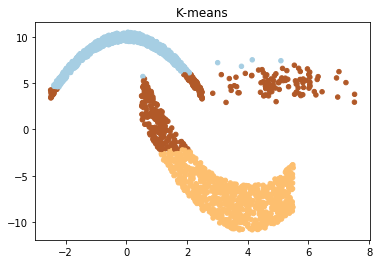

In [19]:
kmeans(X1, 3)

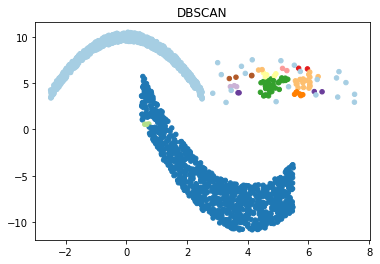

In [20]:
dbscan(X1, 0.3, 2)

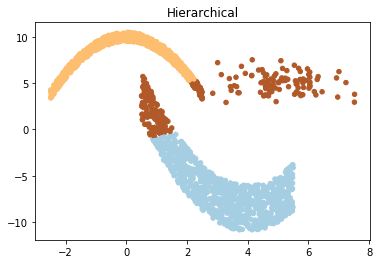

In [21]:
hier(X1, 3)

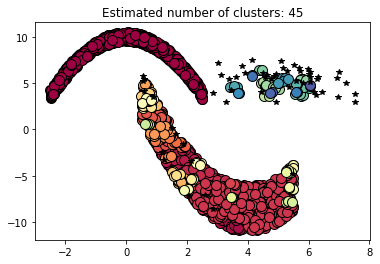

In [22]:
# A sophisticated clustering algorithm of BDSCAN for sample two
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=2).fit(X1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
db_labels = db.labels_
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)

import matplotlib.pyplot as plt
# Black removed and is used for noise instead.
unique_labels = set(db_labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (db_labels == k)

    xy = X1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = X1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], '*', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [23]:
# the k-means algorithm with TensorFlow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [81]:
from sklearn.cluster import KMeans
    
km = KMeans(n_clusters=4).fit(Points)
y_pred = km.predict(Points)

In [94]:
inputs = keras.Input(shape=(2,), name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
x = layers.Dense(16, activation='relu', name='dense_2')(x)
outputs = layers.Dense(8, activation='softmax', name='predictions')(x)

# set the model
model = keras.Model(inputs=inputs, outputs=outputs, name='3_layer_mlp')

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "3_layer_mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
predictions (Dense)          (None, 8)                 136       
Total params: 1,368
Trainable params: 1,368
Non-trainable params: 0
_________________________________________________________________


In [95]:
x_train = Points[0:300]
y_train = y_pred[0:300]
x_test = Points[300:-1]
y_test = y_pred[300:-1]

In [96]:
model.fit(x_train, y_train, epochs=10)

Train on 300 samples
Epoch 1/10
300/300 [==============================] - 1s 2ms/sample - loss: 1.9445 - accuracy: 0.4300
Epoch 2/10
300/300 [==============================] - 0s 90us/sample - loss: 1.8163 - accuracy: 0.5333
Epoch 3/10
300/300 [==============================] - 0s 70us/sample - loss: 1.6981 - accuracy: 0.5500
Epoch 4/10
300/300 [==============================] - 0s 70us/sample - loss: 1.5729 - accuracy: 0.5933
Epoch 5/10
300/300 [==============================] - 0s 90us/sample - loss: 1.4396 - accuracy: 0.7633
Epoch 6/10
300/300 [==============================] - 0s 63us/sample - loss: 1.2994 - accuracy: 0.7833
Epoch 7/10
300/300 [==============================] - 0s 70us/sample - loss: 1.1550 - accuracy: 0.8300
Epoch 8/10
300/300 [==============================] - 0s 67us/sample - loss: 1.0170 - accuracy: 0.8733
Epoch 9/10
300/300 [==============================] - 0s 93us/sample - loss: 0.8871 - accuracy: 0.9033
Epoch 10/10
300/300 [==============================] 